In [1]:
import itertools as it

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from graph_to_corr import (
    graph_to_pcorr,
    pcorr_to_prec,
    prec_to_cov
)
# TODO: could compare pseudoinverse against condition number minimization, against cond min + Cholesky + backsolve?

In [2]:
def simulate_components(p, num_components, tree=False):
    adj_matrix = np.zeros((p, p))
    network_groups = np.array_split(np.arange(p), num_components)
    for group in network_groups:
        i = group[0]
        if tree:
            for j in group[1:]:
                adj_matrix[i, j] = 1
                adj_matrix[j, i] = 1
        else:
            for ix in group[:-1]:
                adj_matrix[ix, ix+1] = 1
                adj_matrix[ix+1, ix] = 1
    return adj_matrix

def simulate_blocks(p, num_components):
    adj_matrix = np.zeros((p, p))
    network_groups = np.array_split(np.arange(p), num_components)
    for group in network_groups:
        for (i, j) in it.combinations(group, 2):
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1
    return adj_matrix

A = simulate_components(20, 2, tree=True)
print(A[:5, :5])

[[0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [3]:
sigma = graph_to_pcorr(A, pos_lims=(0.7, 1), neg_lims=None)
print(sigma[:5, :5])

[[1.         0.93900653 0.87972634 0.74934306 0.84940782]
 [0.93900653 1.         0.         0.         0.        ]
 [0.87972634 0.         1.         0.         0.        ]
 [0.74934306 0.         0.         1.         0.        ]
 [0.84940782 0.         0.         0.         1.        ]]


In [4]:
n = 1000
p = A.shape[0]

# TODO: how is check_valid handled when ignored?
X = np.random.multivariate_normal(mean=np.zeros(p),
                                  cov=sigma,
                                  size=(n,),
                                  check_valid='warn')
print(X[:5, :5])

[[ 0.48215639 -1.21461099 -1.86906553  1.95970811 -0.55606094]
 [-3.37116147  0.09096145  0.10873429 -0.35102915 -1.74408729]
 [-1.4636794   1.58810091  0.78522333 -0.87470227 -0.51303235]
 [-0.63950605 -1.66169746 -1.17491104 -2.37401063 -2.11255912]
 [ 3.68834592 -0.5579327  -0.80348887 -0.44550983  0.66026461]]


/Users/jake/anaconda3/envs/netscape/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


Text(0.5, 1, 'Correlation matrix estimated from data')

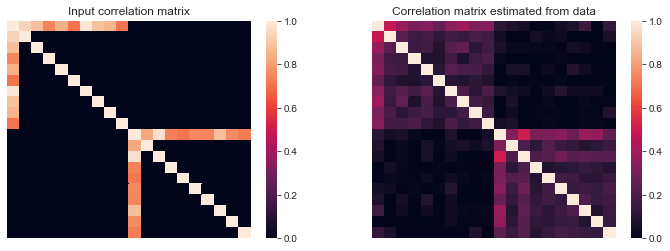

In [5]:
sigma_hat = np.cov(X, rowvar=False)
# bound sigma values between 0 and 1 
# (high variance/diagonal values might skew plot)
sigma_hat[sigma_hat > 1] = 1
sigma_hat[sigma_hat < 0] = 0

sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

sns.heatmap(sigma, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Input correlation matrix')
sns.heatmap(sigma_hat, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Correlation matrix estimated from data')